# Example project: Salary prediction
In this project, we're going to be predicting the salaries of the US workforce.

## Initial Exploratory Data Analysis

Remember that in this step, we only look at an overview of the data. We can't play too much with the data or else we'll introduce a snooping bias.

In [15]:
import pandas as pd

# Import file
df = pd.read_csv('wage_predict.csv')

df

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,N,3,12,2,7,8,4,5,1,1,...,5,5,5,3,1,5,1,5,2,4583.333333
2001,C,3,16,1,12,4,3,3,1,3,...,4,4,4,2,3,4,1,1,2,5858.333333
2002,Q,1,18,2,13,4,4,1,2,2,...,4,4,4,3,2,5,1,2,2,11000.000000
2003,M,4,12,2,7,4,5,1,2,1,...,5,2,5,4,1,5,1,1,2,693.333333


In [16]:
df.head()

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333


In [17]:
df.isnull().sum()

industry                 0
occupation               0
yrs_qual                 0
sex                      0
highest_qual             0
area_of_study            0
influencing              0
negotiating              0
sector                   0
workforce_change         0
no_subordinates          0
choose_hours             0
choose_method            0
job_quals                0
qual_needed              0
experience_needed        0
keeping_current          0
satisfaction             0
advising                 0
instructing              0
problem_solving_quick    0
problem_solving_long     0
labour                   0
manual_skill             0
computer                 0
group_meetings           0
computer_level           0
monthly_salary           0
dtype: int64

In [18]:
df.dtypes

industry                  object
occupation                 int64
yrs_qual                   int64
sex                        int64
highest_qual               int64
area_of_study              int64
influencing                int64
negotiating                int64
sector                     int64
workforce_change           int64
no_subordinates            int64
choose_hours               int64
choose_method              int64
job_quals                  int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                   int64
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

In [19]:
df.describe()

,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,...,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,4.078304,13.877805,1.520200,9.310723,4.104738,3.316209,2.762594,1.385536,2.296758,0.636908,...,3.841397,3.275312,4.252868,3.126185,3.364589,4.402993,1.186035,1.819950,1.378554,4393.986833
std,2.472676,2.767168,0.499716,3.059247,2.605844,1.682291,1.701384,0.621063,0.865284,1.133255,...,1.403511,1.432797,1.121108,1.300828,1.733848,1.275906,0.389232,1.267985,0.864491,4679.512869
min,0.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,34.666667
25%,2.000000,12.000000,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,2.000000,4.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1859.000000
50%,3.000000,13.000000,2.000000,9.000000,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,...,4.000000,3.000000,5.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,3253.466667
75%,5.000000,16.000000,2.000000,12.000000,6.000000,5.000000,5.000000,2.000000,3.000000,1.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,2.000000,2.000000,5458.333333
max,15.000000,21.000000,2.000000,15.000000,9.000000,5.000000,5.000000,3.000000,3.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,3.000000,68553.330000


### Detail on column datatype

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industry               2005 non-null   object 
 1   occupation             2005 non-null   int64  
 2   yrs_qual               2005 non-null   int64  
 3   sex                    2005 non-null   int64  
 4   highest_qual           2005 non-null   int64  
 5   area_of_study          2005 non-null   int64  
 6   influencing            2005 non-null   int64  
 7   negotiating            2005 non-null   int64  
 8   sector                 2005 non-null   int64  
 9   workforce_change       2005 non-null   int64  
 10  no_subordinates        2005 non-null   int64  
 11  choose_hours           2005 non-null   int64  
 12  choose_method          2005 non-null   int64  
 13  job_quals              2005 non-null   int64  
 14  qual_needed            2005 non-null   int64  
 15  expe

### Graphs

array([[<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'yrs_qual'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'highest_qual'}>,
        <Axes: title={'center': 'area_of_study'}>],
       [<Axes: title={'center': 'influencing'}>,
        <Axes: title={'center': 'negotiating'}>,
        <Axes: title={'center': 'sector'}>,
        <Axes: title={'center': 'workforce_change'}>,
        <Axes: title={'center': 'no_subordinates'}>],
       [<Axes: title={'center': 'choose_hours'}>,
        <Axes: title={'center': 'choose_method'}>,
        <Axes: title={'center': 'job_quals'}>,
        <Axes: title={'center': 'qual_needed'}>,
        <Axes: title={'center': 'experience_needed'}>],
       [<Axes: title={'center': 'keeping_current'}>,
        <Axes: title={'center': 'satisfaction'}>,
        <Axes: title={'center': 'advising'}>,
        <Axes: title={'center': 'instructing'}>,
        <Axes: title={'center': 'problem_solving_quick'}>],
  

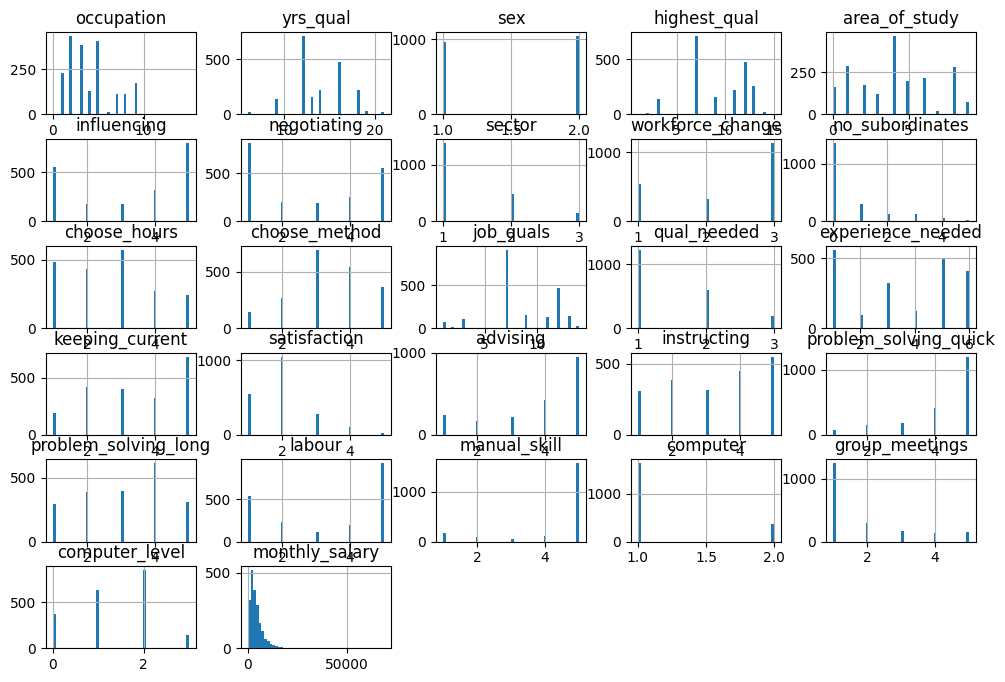

In [21]:
df.hist(bins=50, figsize=(12, 8))

### Create train and test dataset

Using what we've learnt from the book, create some bins for the most important feature in the dataset (it's the monthly salary). Then, use stratified sampling to create a good train and test dataset.

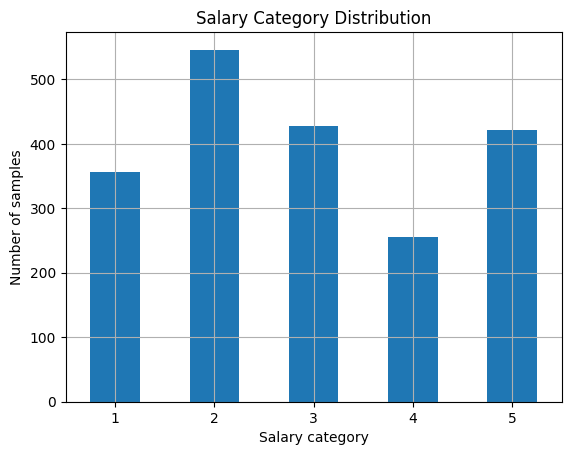

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Create bins for the monthly_salary column
bins = [0., 1500, 3000, 4500, 6000, np.inf]
labels = [1, 2, 3, 4, 5]
df["salary_cat"] = pd.cut(df["monthly_salary"], bins=bins, labels=labels)

# Plot the value counts of the salary categories
df["salary_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Salary category")
plt.ylabel("Number of samples")
plt.title("Salary Category Distribution")
plt.show()


## Stratisfied Sampling

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('monthly_salary', axis=1)  # features
y = df['monthly_salary']  # target variable

# Use stratified sampling to split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=df['salary_cat'], 
                                                    random_state=42)

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 5029620.11
Mean Absolute Error (MAE): 1347.08
R-Squared (R²): 0.66


# Encore the caterogies 

In [23]:
# encore the categories
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('int32')

# Check Correalation using HeatMap

In [24]:
# check correalation between categories using heatmap

import seaborn as sns

corr = df.corr()
sns.heatmap(corr)

ModuleNotFoundError: No module named 'seaborn'

# Attempts

### Attempt 1: Random Forest

In [6]:
# test using random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df.drop('monthly_salary', axis=1)
y = df['monthly_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Get the R-squared value (coefficient of determination)
r2 = rf_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')

Mean squared error: 10134647.05
R-squared: 0.38


### Attempt 2: Linear Regression

In [7]:
# let's do linear regression 
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Get the R-squared value (coefficient of determination)
r2 = lr_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')

Mean squared error: 10247888.38
R-squared: 0.37


### Attempt 3: Gradient Boosting

In [8]:
# GradientBoostingRegressor from kaggle recommendations

from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Get the R-squared value (coefficient of determination)
r2 = gb_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')

Mean squared error: 11405010.61
R-squared: 0.30


### K-Folds

In [9]:
# According to AI, I might need to clean my data a little more for accurate result
# implement k-fold

import numpy as np # linear algebra
from sklearn.model_selection import KFold


cv = KFold(n_splits=10, random_state=1, shuffle=True)
min_error = np.Inf
models_params = 0

## Seperate Target Salary

In [10]:
# seperate target salary from all the other feature

def seperate_target_from_data(df):
    y = df['monthly_salary'].values  # get pandas values as np
    df = df.drop(columns=['monthly_salary'])
    X = df.loc[:, 'occupation':].values
    return X, y

## Normalize the Data

In [11]:
# normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def prepocess_dataset(x):
    # scale while keeping ordinal data
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(x)
    x = min_max_scaler.transform(x)
    return x

## Train Model Function

In [12]:
# train model function

def train_model(x_train, y_train, model):
    model.fit(x_train, y_train)
    return model

In [13]:

from sklearn.metrics import mean_absolute_error

def calc_error(title, expected, predicted):
    # calculate errors
    errors = mean_absolute_error(expected, predicted)
    return errors

# predict model function
def predict_model(x_test, y_test, model):
    y_predict = model.predict(x_test)
    error = calc_error("GradientBoostingRegressor", y_test, y_predict)
    return error

def calc_min_error(error_val, min_error):
    save_this_value = False
    if min_error > error_val:
        min_error = error_val
        save_this_value = True
    return min_error, save_this_value

In [14]:
def evaluate_model(model, kf, learning_rate, depth, fd, min_error):
    X, y = seperate_target_from_data(fd)
    local_min = np.inf
    model_params = None
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train = prepocess_dataset(X_train)
        model = train_model(X_train, y_train, model)
        error_val = predict_model(X_train, y_train, model)
        min_error, save_this_value = calc_min_error(error_val, min_error)
        if save_this_value:
            model_params = (learning_rate, depth)
        local_min , save_this_value = calc_min_error(error_val, local_min)
        if save_this_value:
            local_model_params = (learning_rate, depth)    
    # report error
    print(type(model).__name__, " mae =  ", local_min)
    return min_error, model_params

In [15]:
# linear regression 2

lr = 0
d= 0
model = LinearRegression()
min_error, _ = evaluate_model(model, cv, lr, d, df, min_error)
print("best mean_absolute_error (mae) after  LinearRegression = ", min_error)

LinearRegression  mae =   1973.2987671565552
best mean_absolute_error (mae) after  LinearRegression =  1973.2987671565552


In [16]:
# random forest regressor
for d in range(3,20):
    print("max_depth= ", d )
    model = RandomForestRegressor(max_depth=d, random_state=0)
    min_error, model_params = evaluate_model(model, cv, lr, d, df, min_error)
    if model_params != None:
        best_model_params = model_params
print("best mean_absolute_error (mae) after RandomForestRegressor = ", min_error, " with params: ", best_model_params)

max_depth=  3
RandomForestRegressor  mae =   1859.4667456296095
max_depth=  4
RandomForestRegressor  mae =   1758.9947176030046
max_depth=  5
RandomForestRegressor  mae =   1645.9185643392807
max_depth=  6
RandomForestRegressor  mae =   1503.5378128486334
max_depth=  7
RandomForestRegressor  mae =   1366.7171796409873
max_depth=  8
RandomForestRegressor  mae =   1223.048278377622
max_depth=  9
RandomForestRegressor  mae =   1101.038437534252
max_depth=  10
RandomForestRegressor  mae =   988.4853455152652
max_depth=  11
RandomForestRegressor  mae =   904.5184495892338
max_depth=  12
RandomForestRegressor  mae =   841.2264313029588
max_depth=  13
RandomForestRegressor  mae =   803.4493969958163
max_depth=  14
RandomForestRegressor  mae =   773.8207020391469
max_depth=  15
RandomForestRegressor  mae =   764.5708534195761
max_depth=  16
RandomForestRegressor  mae =   746.2637303667984
max_depth=  17
RandomForestRegressor  mae =   741.2559415454081
max_depth=  18
RandomForestRegressor  mae 

In [17]:
# gradient booster

for lr in (0.1, 0.001, 0.3, 0.2):
        for d in range(3,9):
            print("learning_rate = ", lr, "max_depth= ", d )
            model = GradientBoostingRegressor(learning_rate = lr, max_depth = d)
            min_error, models_params = evaluate_model(model, cv, lr, d, df, min_error)
            if model_params != None:
                best_model_params = model_params
print("best GradientBoostingRegressor mean_absolute_error (mae)= ", min_error, " with params: ", best_model_params)

learning_rate =  0.1 max_depth=  3
GradientBoostingRegressor  mae =   1548.0480809906621
learning_rate =  0.1 max_depth=  4
GradientBoostingRegressor  mae =   1283.6083185124633
learning_rate =  0.1 max_depth=  5
GradientBoostingRegressor  mae =   935.350811229737
learning_rate =  0.1 max_depth=  6
GradientBoostingRegressor  mae =   603.5319428984254
learning_rate =  0.1 max_depth=  7
GradientBoostingRegressor  mae =   327.6566834767677
learning_rate =  0.1 max_depth=  8
GradientBoostingRegressor  mae =   148.88443293197724
learning_rate =  0.001 max_depth=  3
GradientBoostingRegressor  mae =   2539.353467855978
learning_rate =  0.001 max_depth=  4
GradientBoostingRegressor  mae =   2526.2470273430245
learning_rate =  0.001 max_depth=  5
GradientBoostingRegressor  mae =   2512.7238744260058
learning_rate =  0.001 max_depth=  6
GradientBoostingRegressor  mae =   2501.441765890915
learning_rate =  0.001 max_depth=  7
GradientBoostingRegressor  mae =   2484.3664319173154
learning_rate =  

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

min_error = float('inf')
best_model_params = None

for lr in (0.1, 0.001, 0.3, 0.2):
    for d in range(3, 9):
        model = GradientBoostingRegressor(learning_rate=lr, max_depth=d)
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        mae = -scores.mean()  # Convert to positive MAE

        if mae < min_error:
            min_error = mae
            best_model_params = (lr, d)

print("Best GradientBoostingRegressor mean_absolute_error (mae)= ", min_error, " with params: ", best_model_params)

Best GradientBoostingRegressor mean_absolute_error (mae)=  1937.4629928307986  with params:  (0.1, 3)


## Gradient Boosting Code

In [19]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

# Load the dataset
#df = pd.read_csv('your_data.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Encode categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col])   

# Scale numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Split data into training and testing sets
X = df.drop(['monthly_salary'], axis=1)
y = df['monthly_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter tuning space
hyperparams = {'learning_rate': [0.1, 0.001, 0.3, 0.2], 'max_depth': range(3, 9)}

# Perform hyperparameter tuning
min_error = float('inf')
best_model_params = None
for lr in hyperparams['learning_rate']:
    for d in hyperparams['max_depth']:
        model = GradientBoostingRegressor(learning_rate=lr, max_depth=d)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        mae = -scores.mean()
        if mae < min_error:
            min_error = mae
            best_model_params = (lr, d)

print("Best GradientBoostingRegressor mean_absolute_error (mae)= ", min_error, " with params: ", best_model_params)

# Train the best model on the entire training set
model = GradientBoostingRegressor(learning_rate=best_model_params[0], max_depth=best_model_params[1])
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Final mean_absolute_error (mae)= ", mae)

#With a mean absolute error (MAE) of 0.4305876210189606, and considering the target variable is salary in thousands, we can interpret the result as follows:
#The model is, on average, off by approximately 430.59 dollars (or 0.430587 thousand dollars) from the actual salary.
#This means that if the model predicts a salary of, say, 50 thousand dollars, the actual salary could be anywhere between 49,569.41 and 50,430.59 dollars.

C:\Users\Carol\AppData\Local\Temp\ipykernel_976\1836097670.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


Best GradientBoostingRegressor mean_absolute_error (mae)=  0.4329835367344752  with params:  (0.1, 3)
Final mean_absolute_error (mae)=  0.41528645423234334


## Linear Regression Coding

In [20]:
# linear regression 3

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression mean_absolute_error (mae)= ", mae)

Linear Regression mean_absolute_error (mae)=  0.4303950238737273


## Linear Regression Coding
### Importance of Features

In [21]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Regression mean_absolute_error (mae)= ", mae)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_df)


Random Forest Regression mean_absolute_error (mae)=  0.4037327406848007
Feature Importances:
                  Feature  Importance
13              job_quals    0.175460
15      experience_needed    0.068477
0                industry    0.060347
5           area_of_study    0.057344
14            qual_needed    0.053353
2                yrs_qual    0.052436
11           choose_hours    0.047402
1              occupation    0.040961
18               advising    0.040661
4            highest_qual    0.037624
12          choose_method    0.035362
16        keeping_current    0.033141
7             negotiating    0.033138
19            instructing    0.032230
10        no_subordinates    0.031069
21   problem_solving_long    0.030077
17           satisfaction    0.024176
9        workforce_change    0.022460
25         group_meetings    0.022417
6             influencing    0.021271
3                     sex    0.019882
23           manual_skill    0.015024
26         computer_level    0.01

In [22]:
print(y_pred)

[-1.13984895e-02 -1.17910111e-01 -5.88856505e-01  7.49948593e-02
  2.73544181e-01 -9.81050830e-02 -3.77593026e-01 -4.84851330e-01
  3.28195708e-01  1.33430137e+00  1.26363006e-01  5.34590672e-02
  3.52005727e-01  4.85516702e-02 -1.25006863e-01 -5.01699657e-01
  1.00447574e+00  1.55690680e-01 -1.53876327e-02 -3.73484629e-01
 -2.09511413e-01 -5.48007286e-01 -3.35778053e-01  5.18460611e-01
  1.34663162e-01 -5.07118710e-01  4.64376395e-02  1.15570751e-01
  2.72888481e-01 -4.95673916e-01 -3.26715804e-01  5.38147556e-02
 -3.77059304e-01  2.37721257e-01 -3.50015956e-01 -1.42525222e-01
 -5.62323207e-01  1.06131140e-01  6.32853681e-02  2.96125213e-01
 -4.32810499e-01 -3.83463106e-01  2.04610037e-01  7.34851202e-02
 -1.75108903e-02  7.96325385e-01  1.66147061e+00 -1.09212813e-01
 -6.72799459e-01  7.44499768e-01 -2.85263213e-03  1.49761187e+00
 -5.96909472e-01 -5.78756923e-01  1.49857179e-01 -3.38847194e-01
 -6.33187203e-01 -5.20195098e-01 -5.22624796e-01  1.12713306e+00
  1.22309401e-01 -3.74156

## Add the prediction to the dataframe

In [23]:
#import pandas as pd

# Assume 'df' is your original dataframe
# and 'y_pred' is the array of predicted values

# Create a new dataframe with the predicted values
pred_df = pd.DataFrame({'Predicted': y_pred})

# Concatenate the original dataframe with the predicted values
result_df = pd.concat([df, pred_df], axis=1)

# Print the resulting dataframe
print(result_df)

      industry  occupation  yrs_qual       sex  highest_qual  area_of_study  \
0     1.195416   -0.840718  1.851522 -1.041249      1.206244      -0.040204   
1    -1.615149    1.990930  0.044170 -1.041249      0.552325       1.111342   
2     0.191643   -0.436197  0.767111  0.960385      0.879284      -0.040204   
3     1.195416    0.372845 -0.678771  0.960385     -0.755513      -0.040204   
4     0.994662   -1.245239  1.490052 -1.041249      1.206244      -0.040204   
...        ...         ...       ...       ...           ...            ...   
2000  0.593152   -0.436197 -0.678771  0.960385     -0.755513       1.495191   
2001 -1.615149   -0.436197  0.767111 -1.041249      0.879284      -0.040204   
2002  1.195416   -1.245239  1.490052  0.960385      1.206244      -0.040204   
2003  0.392398   -0.031676 -0.678771  0.960385     -0.755513      -0.040204   
2004 -0.812130    0.372845 -0.678771  0.960385     -0.755513       1.111342   

      influencing  negotiating    sector  workforce

### View raw dataframe

In [24]:
print(df)

      industry  occupation  yrs_qual       sex  highest_qual  area_of_study  \
0     1.195416   -0.840718  1.851522 -1.041249      1.206244      -0.040204   
1    -1.615149    1.990930  0.044170 -1.041249      0.552325       1.111342   
2     0.191643   -0.436197  0.767111  0.960385      0.879284      -0.040204   
3     1.195416    0.372845 -0.678771  0.960385     -0.755513      -0.040204   
4     0.994662   -1.245239  1.490052 -1.041249      1.206244      -0.040204   
...        ...         ...       ...       ...           ...            ...   
2000  0.593152   -0.436197 -0.678771  0.960385     -0.755513       1.495191   
2001 -1.615149   -0.436197  0.767111 -1.041249      0.879284      -0.040204   
2002  1.195416   -1.245239  1.490052  0.960385      1.206244      -0.040204   
2003  0.392398   -0.031676 -0.678771  0.960385     -0.755513      -0.040204   
2004 -0.812130    0.372845 -0.678771  0.960385     -0.755513       1.111342   

      influencing  negotiating    sector  workforce